# SIFT (Scale-Invariant Feature Transform)

Quy trình thực hiện SIFT gồm 4 phần:
- Xây dựng không gian tỷ lệ (Scale Space Construction)
- Định vị điểm đặc trưng (Keypoint Localisation)
- Phân bổ hướng (Orientation Assignment)
- Mô tả điểm đặc trưng (Keypoint Descriptor)

## 1. Xây dựng không gian tỷ lệ
- Ý tưởng: Tính bất biến theo tỷ lệ có nghĩa là một đặc trưng phải được nhận diện bất kể kích thước của nó trong hình ảnh. Để làm điều này, SIFT xây dựng một không gian tỷ lệ bằng cách áp dụng bộ lọc Gaussian với nhiều giá trị sigma khác nhau trên hình ảnh gốc.
- Bộ lọc Gaussian trong 2 chiều: 
    $$ G(x, y) = \frac{1}{2 \pi \sigma ^ 2} e^{-\frac{x^2 + y^2}{2 \sigma^2} } $$
    + $x, y$ là tọa độ cách điểm ảnh
    + $\sigma$ là độ lệch chuẩn, điều khiển mức độ làm mờ
- Các bước thực hiện:
    + Bắt đầu với hình ảnh gốc, SIFT tạo ra một loạt các hình ảnh làm mờ bằng cách sử dụng bộ lọc Gaussian với các giá trị sigma khác nhau, làm tăng mức độ làm mờ.
    +  Tạo ra các DoG (Difference of Gaussians) : hiệu giữa hai hình ảnh được làm mờ liền kề. DoG giúp tìm ra các điểm đặc trưng bằng cách xác định sự thay đổi đột ngột về độ sáng trong hình ảnh. Những thay đổi này thường xảy ra tại các cạnh, góc hoặc các đối tượng có sự chuyển đổi mạnh về màu sắc hoặc độ sáng
    + Giảm kích thước hình ảnh, lặp lại bước trên. 
    
| ![DoG](image/DoG.png) | ![](image/DoG1.jpg) |
| --------------------- | -------------------------- |
![Gaussian](image/blur.jpg)

## 2. Định vị điểm đặc trưng
- Ý tưởng: Tìm ra các điểm cực đại  và cực tiểu trong không gian tỷ lệ, từ đó xác định các điểm đặc trưng có ý nghĩa.
- Để tìm cực đại và cực tiểu cục bộ, chúng ta sẽ duyệt qua từng pixel trong hình ảnh và so sánh với các 26 pixel lân cận (trong không gian 3 chiều). Nếu điểm đó là lớn nhất hay nhỏ nhất thì sẽ được chọn làm điểm tiềm năng

![](image/b2.jpg)

- Loại bỏ các điểm chính không ổn định: những điểm có độ tương phản thấp hoặc gần các cạnh sắc

## 3. Phân bổ hướng
- Thực hiện chỉ định cho tập các điểm đặc trưng để chúng bất biến với các phép xoay hình. 
- Các bước:
Với mỗi điểm đặc trưng đã chọn, SIFT tạo ra một biểu đồ histogram dựa trên các gradient cục bộ trong một khu vực xung quanh điểm đặc trưng. Gradient tại mỗi điểm lân cận được tính toán bằng cách sử dụng công thức sau:

    + Độ lớn của gradient
    Độ lớn của gradient được tính bằng công thức:

    $$
    m(x, y) = \sqrt{(L(x + 1, y) - L(x - 1, y))^2 + (L(x, y + 1) - L(x, y - 1))^2}
    $$

    + Hướng của gradient
    Hướng của gradient được tính bằng công thức:

    $$
    \theta(x, y) = \tan^{-1}\left(\frac{L(x, y + 1) - L(x, y - 1)}{L(x + 1, y) - L(x - 1, y)}\right)
    $$

    + Biểu đồ histogram được tạo ra với trục x chứa giá trị hướng (hay góc) của gradient trong một khu vực nhất định. Hướng của gradient chiếm ưu thế trong biểu đồ (hướng có tần suất xuất hiện cao nhất) sẽ được chọn làm hướng cho điểm đặc trưng đó. Nếu có nhiều hướng mạnh mẽ, SIFT có thể tạo ra nhiều điểm đặc trưng cho một vị trí, mỗi điểm đặc trưng có hướng khác nhau.

## 4. Mô tả điểm đặc trưng
- Mỗi điểm đặc trưng cần có một vector mô tả đặc trưng (descriptor) duy nhất để có thể được sử dụng trong so sánh và khớp đặc trưng giữa các hình ảnh.
- Cách thực hiện:

    + Với mỗi điểm đặc trưng, SIFT tính toán các gradient cục bộ trong một vùng xung quanh điểm đặc trưng đó.
    + Khu vực xung quanh điểm đặc trưng được chia thành các ô nhỏ (4x4), trong mỗi ô tính toán độ lớn của gradient và hướng
    + Vector mô tả được tạo ra bằng cách ghép nối tất cả các biểu đồ hướng từ các ô thành một vector lớn. Thông thường, vector này có kích thước 128 (4x4 ô và mỗi ô có 8 hướng).
    + Vector mô tả này được chuẩn hóa để giảm thiểu ảnh hưởng của thay đổi độ sáng, đảm bảo rằng vector không bị thay đổi nhiều khi có sự biến đổi độ sáng cục bộ trong hình ảnh.

![](image/descriptor.jpg)

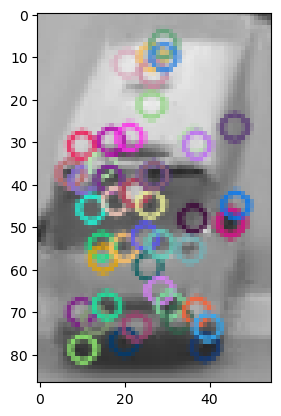

In [2]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('vehicle/Training/bus/20170324_0720-0740_3100.png_1.png')


gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

Tìm kiếm và khớp các đặc trưng của 2 hình ảnh

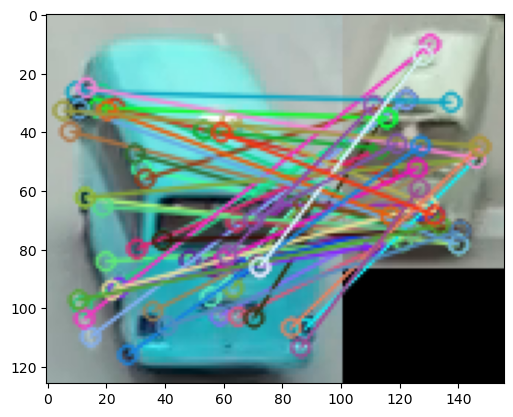

(<matplotlib.image.AxesImage at 0x27834e85dd0>, None)

In [10]:
import cv2 
import matplotlib.pyplot as plt

img1 = cv2.imread('vehicle/Training/bus/20170324_0720-0740_9400.png_0.png')
img2 = cv2.imread('vehicle/Training/bus/20170324_0720-0740_3100.png_1.png')

gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(gray_img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray_img2, None)

bf = cv2.BFMatcher()

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

# Khớp 50 đặc trưng
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [15]:
descriptors_1[0]

array([ 29., 123.,  87.,   3.,   0.,   0.,   0.,   0.,  38., 150.,  33.,
         0.,   0.,   0.,   0.,   0.,  14.,  17.,   1.,   0.,   4.,   2.,
         0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,  26.,
        78., 112.,  26.,  15.,   2.,   0.,   2., 150., 150.,  28.,   0.,
         0.,   0.,   0.,   6., 109.,  20.,   0.,   0.,   6.,   3.,   0.,
         2.,   0.,   0.,   0.,   0.,   3.,   2.,   0.,   0.,  31.,   4.,
         2.,   4.,  19.,  24.,  96.,  88., 150.,  10.,   0.,   0.,   0.,
         1.,  38., 150., 101.,   2.,   0.,   3.,   4.,   0.,   0.,  24.,
         0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,  35.,   0.,   0.,
         0.,   1.,   8.,  89., 150.,  19.,   0.,   0.,   1.,   1.,   1.,
        64., 150.,   7.,   0.,   0.,   2.,   4.,   0.,   1.,  14.,   0.,
         0.,   0.,   0.,   1.,   0.,   0.,   0.], dtype=float32)